In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv('찐결측처리데이터/combined_df.csv')
df = df.iloc[:,1:]
df

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.000000,-4.898587e-15
1,2020-01-01 00:10:00,126.16000,33.30000,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.000000,-4.898587e-15
2,2020-01-01 00:20:00,126.16000,33.30000,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.000000,-4.898587e-15
3,2020-01-01 00:30:00,126.16000,33.30000,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.000000,-4.898587e-15
4,2020-01-01 00:40:00,126.16000,33.30000,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.000000,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,2021-12-31 23:10:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00089,-0.00015,-0.0003,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-65.69170,45,0.173648,-9.848078e-01
1578956,2021-12-31 23:20:00,126.38121,34.81689,0.0,0.00000,0.00000,-0.00149,0.00015,0.0000,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-67.56294,45,0.173648,-9.848078e-01
1578957,2021-12-31 23:30:00,126.38121,34.81689,0.0,0.00000,0.00000,0.00000,0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-69.37752,45,0.173648,-9.848078e-01
1578958,2021-12-31 23:40:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-71.11812,45,0.173648,-9.848078e-01


In [4]:
stn_index = df['lon'].value_counts().index
stn_index

Float64Index([   126.16, 128.89098,   126.965,  126.6249, 130.89864, 127.44066,
                 126.33, 127.37212, 129.37962, 128.65295,   127.119, 129.33472,
              126.89158, 129.03203, 126.38121],
             dtype='float64')

In [5]:
df_stn = [0]*15
for i in range(15):
    df_stn[i] = df.groupby('lon').get_group(stn_index[i])
df_stn[0]

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.0,-4.898587e-15
1,2020-01-01 00:10:00,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.0,-4.898587e-15
2,2020-01-01 00:20:00,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.0,-4.898587e-15
3,2020-01-01 00:30:00,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.0,-4.898587e-15
4,2020-01-01 00:40:00,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.0,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105259,2021-12-31 23:10:00,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-66.05597,71,1.0,-4.898587e-15
105260,2021-12-31 23:20:00,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-68.01080,71,1.0,-4.898587e-15
105261,2021-12-31 23:30:00,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,-0.0003,-0.00065,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-69.91946,71,1.0,-4.898587e-15
105262,2021-12-31 23:40:00,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-71.76646,71,1.0,-4.898587e-15


In [6]:
df.columns

Index(['Datetime', 'lon', 'lat', 'uv', 'band1', 'band2', 'band3', 'band4',
       'band5', 'band6', 'band7', 'band8', 'band9', 'band10', 'band11',
       'band12', 'band13', 'band14', 'band15', 'band16', 'sateza', 'esr',
       'height', 'landtype', 'pm10', 'pm2.5', '강수량', '기온(°C)', '풍속(m/s)',
       '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '해면기압(hPa)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', 'solaraa', '해발고도', '풍향_cos', '풍향_sin'],
      dtype='object')

# STL 분해

In [7]:
# !pip install statsmodels

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [8]:
stn=[0]*15
for i in range(15):
    stn[i]=df_stn[i]
stn[0]

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.0,-4.898587e-15
1,2020-01-01 00:10:00,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.0,-4.898587e-15
2,2020-01-01 00:20:00,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.0,-4.898587e-15
3,2020-01-01 00:30:00,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.0,-4.898587e-15
4,2020-01-01 00:40:00,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.0,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105259,2021-12-31 23:10:00,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-66.05597,71,1.0,-4.898587e-15
105260,2021-12-31 23:20:00,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-68.01080,71,1.0,-4.898587e-15
105261,2021-12-31 23:30:00,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,-0.0003,-0.00065,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-69.91946,71,1.0,-4.898587e-15
105262,2021-12-31 23:40:00,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-71.76646,71,1.0,-4.898587e-15


In [9]:
# stl분해가 필요한 칼럼 리스트
stl_list=['uv', 'band1', 'band2', 'band3', 'band4','band5', 'band6', 'band7', 'band8', 'band9', 'band10', 'band11','band12', 'band13', 'band14', 'band15', 'band16', 'esr','pm10', 'pm2.5', '강수량', '기온(°C)', '풍속(m/s)','습도(%)', '증기압(hPa)', '이슬점온도(°C)', '해면기압(hPa)', '전운량(10분위)','중하층운량(10분위)', '지면온도(°C)', 'solaraa', '풍향_cos', '풍향_sin']

## stn1

In [10]:
residue=[0]*(len(stl_list))
stn[0]['Datetime'] = pd.to_datetime(stn[0]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[0] = stn[0].set_index('Datetime')

C:\Users\JAE\AppData\Local\Temp\ipykernel_10036\2627028691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[0]['Datetime'] = pd.to_datetime(stn[0]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [11]:
for i in range(len(stl_list)):
    res = STL(stn[0][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
residue[0]

,resid
Datetime,
2020-01-01 00:00:00,0.000004
2020-01-01 00:10:00,-0.000016
2020-01-01 00:20:00,-0.000040
2020-01-01 00:30:00,-0.000052
2020-01-01 00:40:00,-0.000010
...,...
2021-12-31 23:10:00,0.000055
2021-12-31 23:20:00,-0.000045
2021-12-31 23:30:00,-0.000089


In [12]:
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], residue[31], residue[32]]

In [13]:
# 데이터프레임들을 병합
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']

# 병합된 데이터프레임 출력
merged_df

,uv,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,습도(%),증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,풍향_cos,풍향_sin
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.000004,0.000413,0.000098,0.000084,-0.000903,0.000155,-0.000075,3.073563,0.312385,0.752173,...,-0.696875,-0.069949,-0.109715,0.166700,-0.000015,-1.657716e-07,-0.005496,1.647369,0.006151,-0.009737
2020-01-01 00:10:00,-0.000016,-0.000288,-0.000060,0.001209,-0.000193,-0.000186,0.000004,0.664371,0.429766,0.754047,...,-0.663812,-0.051938,-0.066950,0.166320,-0.000016,4.498795e-07,0.006308,0.419671,0.007178,-0.015350
2020-01-01 00:20:00,-0.000040,0.000282,0.000263,-0.000243,0.000241,0.000071,0.000003,1.158467,0.557154,0.831468,...,-0.838414,-0.086271,-0.136670,0.203073,-0.000012,-1.511126e-05,0.011819,-0.644961,0.003861,-0.008926
2020-01-01 00:30:00,-0.000052,-0.000163,0.000259,0.000065,0.000267,-0.000627,-0.000231,1.642745,0.674040,0.903232,...,-0.854069,-0.078363,-0.112379,0.268028,-0.000003,-2.805098e-05,0.009208,-1.483783,-0.038804,0.106167
2020-01-01 00:40:00,-0.000010,-0.000775,-0.000225,-0.000679,-0.000544,-0.000204,0.000078,1.217984,0.464763,0.693264,...,-0.666270,-0.072700,-0.091802,0.152702,0.000013,-4.916308e-05,0.000811,-2.030602,0.010571,-0.032012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,0.000055,-0.000779,0.000575,0.000112,-0.000312,-0.000036,0.000164,1.645114,0.397145,0.696891,...,0.125174,-0.033015,-0.060709,0.289475,-0.257460,2.606264e-01,-0.025157,-2.524984,0.002845,0.007817
2021-12-31 23:20:00,-0.000045,0.000408,-0.000038,-0.000254,-0.000566,0.000363,0.000227,4.229321,0.543735,0.862968,...,0.384487,0.006508,-0.004072,0.049831,-0.041396,4.499698e-01,-0.002459,-3.639763,0.006502,0.017863
2021-12-31 23:30:00,-0.000089,-0.000020,-0.000149,0.001004,0.000008,-0.000232,-0.000197,2.749027,0.462392,0.446532,...,0.265440,0.001448,0.002926,0.039664,0.119451,4.243570e-01,0.009898,-4.810434,0.009853,0.027071


### stn1 - STL분해 후 이상치 처리 전

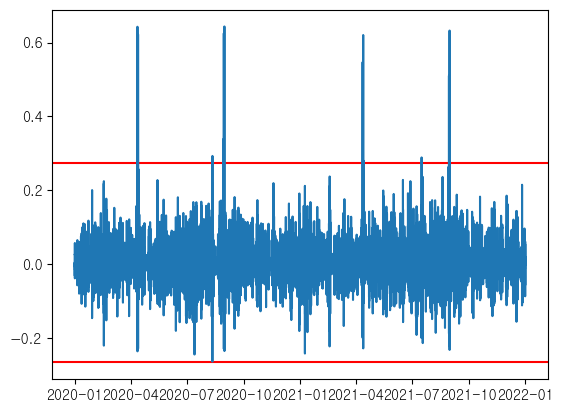

In [16]:

Q1 = np.percentile(merged_df[merged_df.columns[1]], 1.2)
Q3 = np.percentile(merged_df[merged_df.columns[1]], 98.8)
IQR = Q3 - Q1 
IQR = IQR if IQR > 0 else -1*IQR
lower = Q1 - 1.5*IQR
higher = Q3 + 1.5*IQR

plt.axhline(y=lower, color='red')
plt.axhline(y=higher, color='red')
plt.plot(merged_df[merged_df.columns[1]])

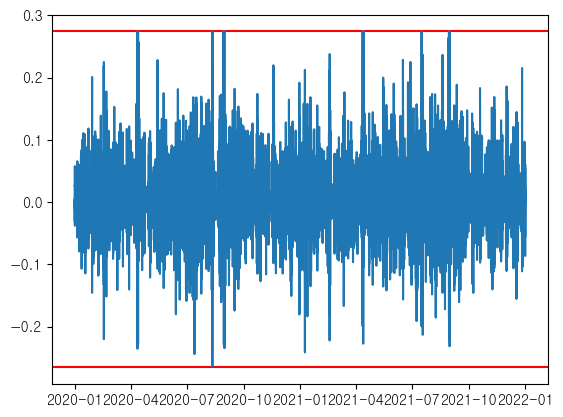

In [18]:
Q1 = np.percentile(merged_df[merged_df.columns[1]], 1.2)
Q3 = np.percentile(merged_df[merged_df.columns[1]], 98.8)
IQR = Q3 - Q1 
IQR = IQR if IQR > 0 else -1*IQR
lower = Q1 - 1.5*IQR
higher = Q3 + 1.5*IQR
merged_df.loc[merged_df[merged_df.columns[1]]<lower, merged_df.columns[1]] = lower
merged_df.loc[merged_df[merged_df.columns[1]]>higher, merged_df.columns[1]] = higher
    
    
Q1 = np.percentile(merged_df[merged_df.columns[1]], 1.2)
Q3 = np.percentile(merged_df[merged_df.columns[1]], 98.8)
IQR = Q3 - Q1 
IQR = IQR if IQR > 0 else -1*IQR
lower = Q1 - 1.5*IQR
higher = Q3 + 1.5*IQR

plt.axhline(y=lower, color='red')
plt.axhline(y=higher, color='red')
plt.plot(merged_df[merged_df.columns[1]])

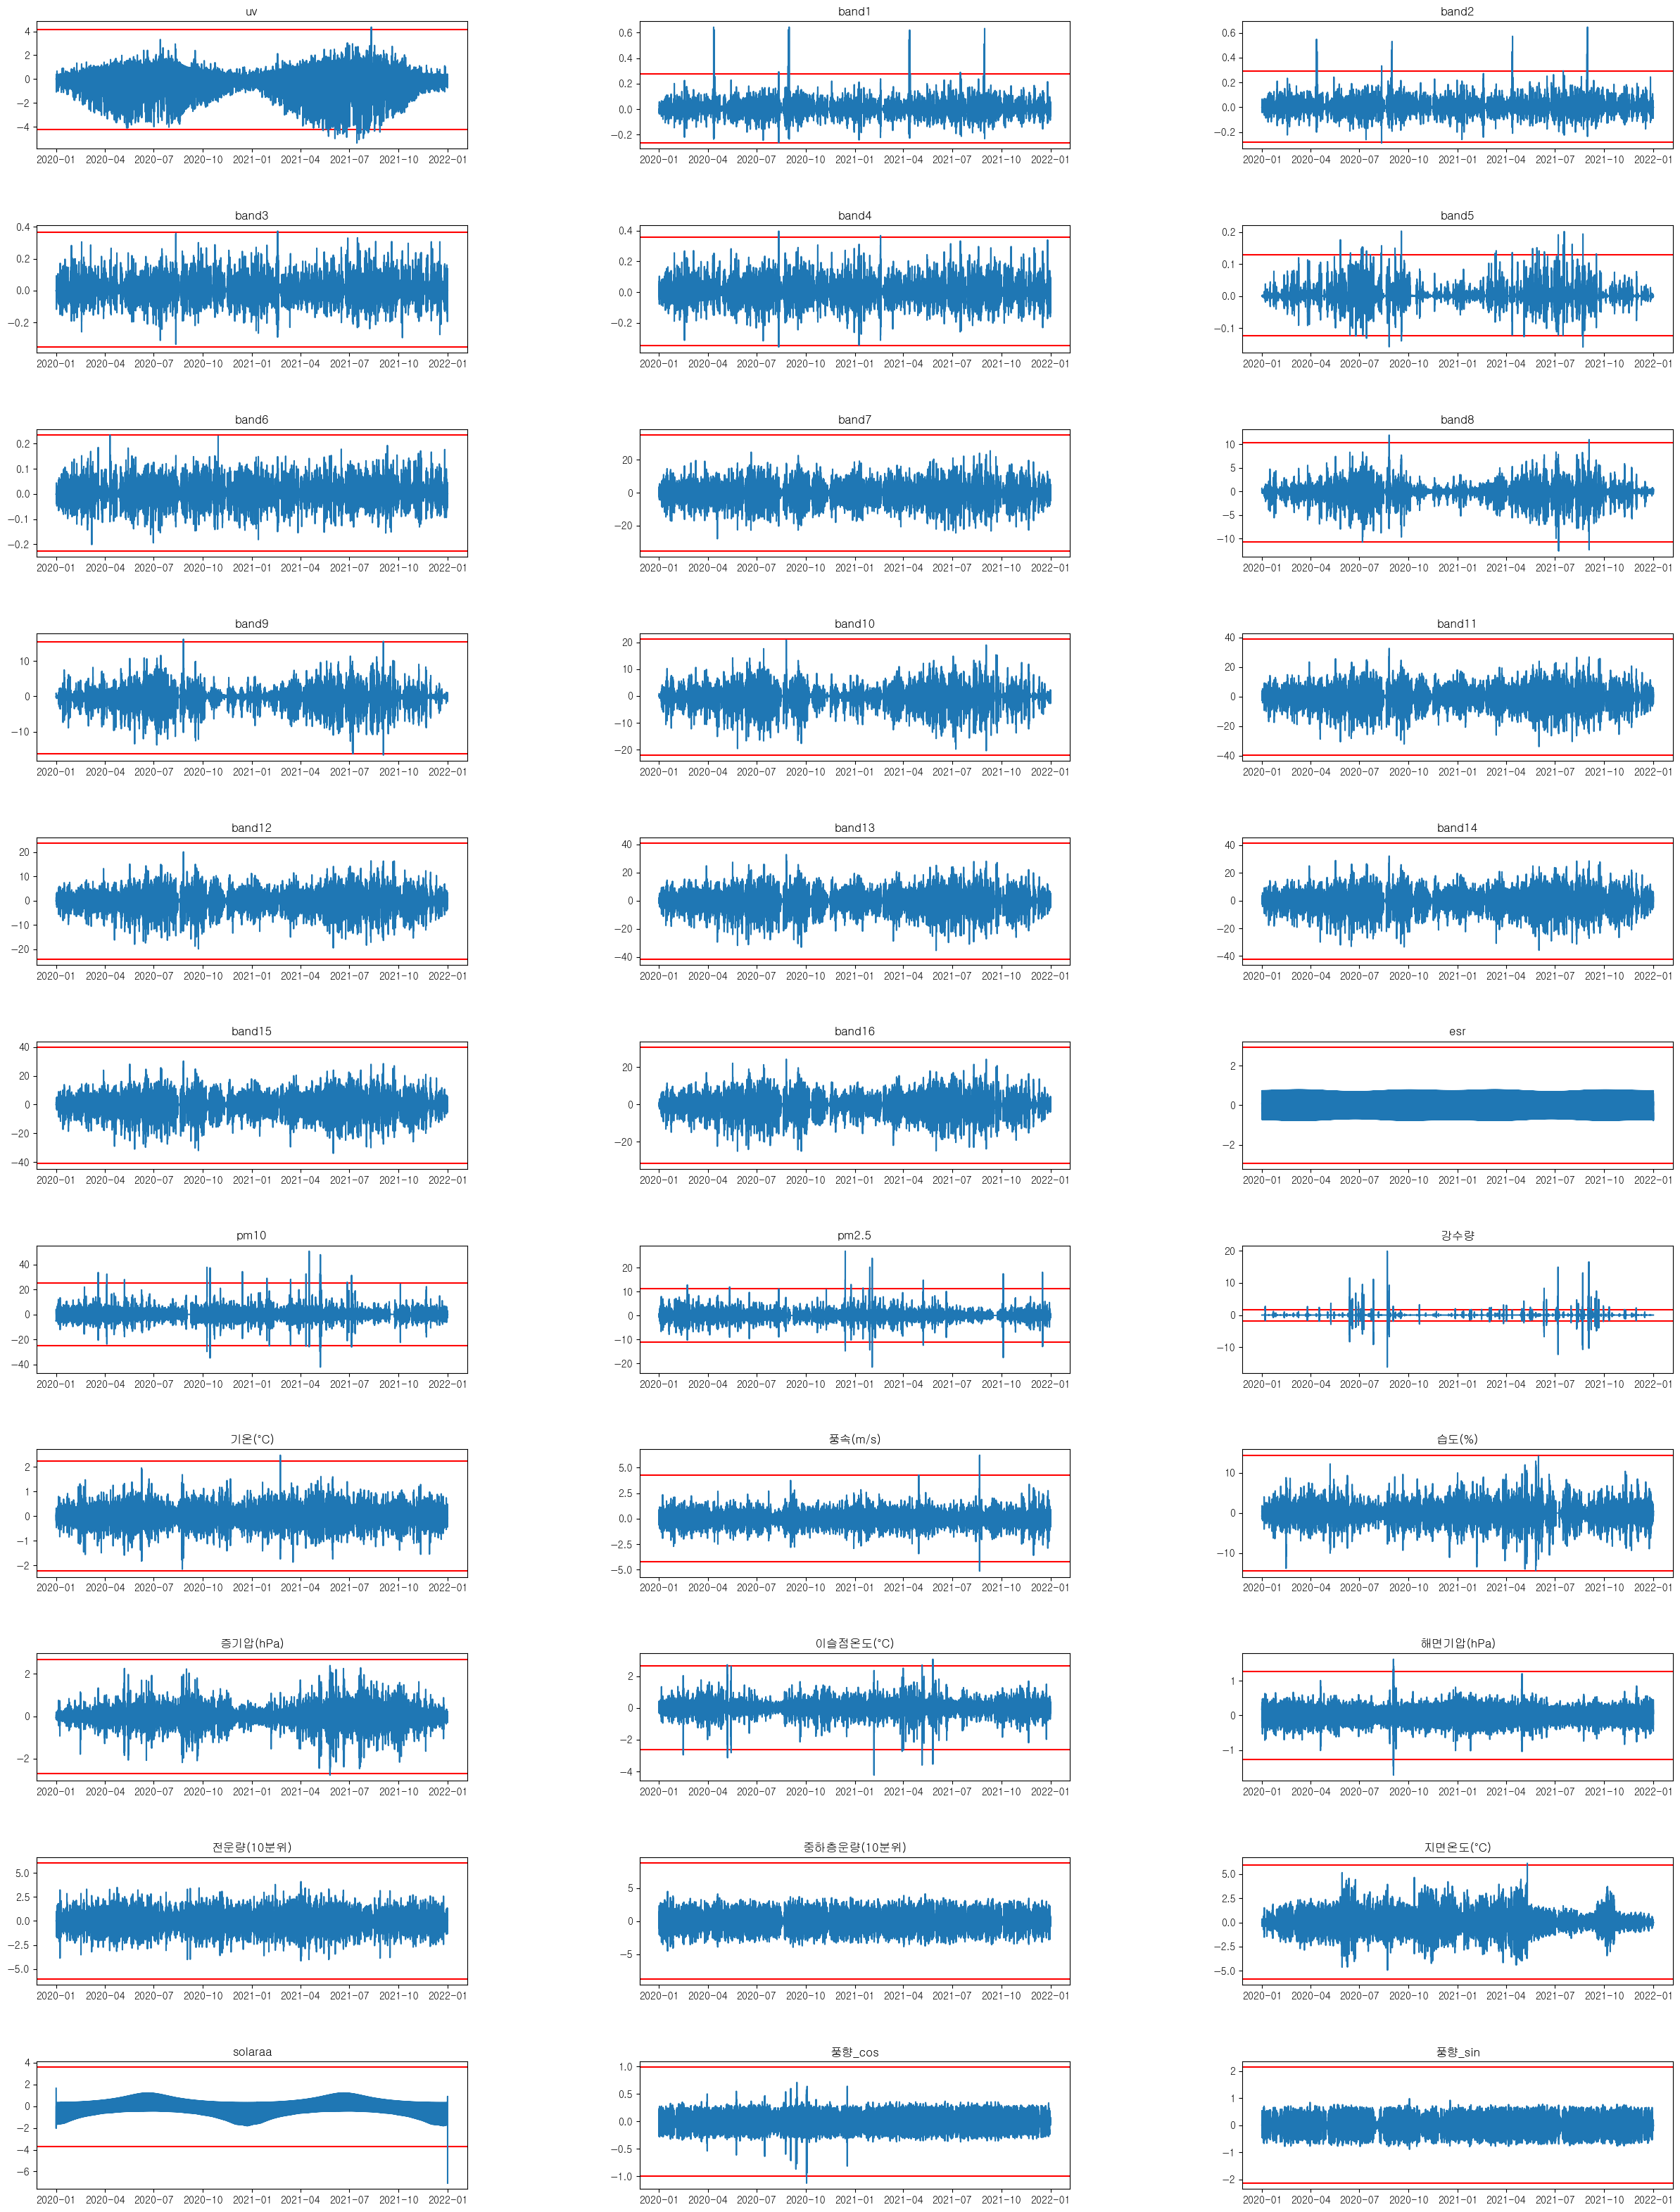

In [15]:
gp = plt.figure(figsize=(30,40))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.6)  # figure 설정
    
for i in range(1,34):
    ax = gp.add_subplot(11, 3, i)
    ax.set_title(f'{merged_df.columns[i-1]}')
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR

    ax.axhline(y=lower, color='red')
    ax.axhline(y=higher, color='red')
    plt.plot(merged_df[merged_df.columns[i-1]])

### stn1 - STL분해 후 이상치 처리 후

In [16]:
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

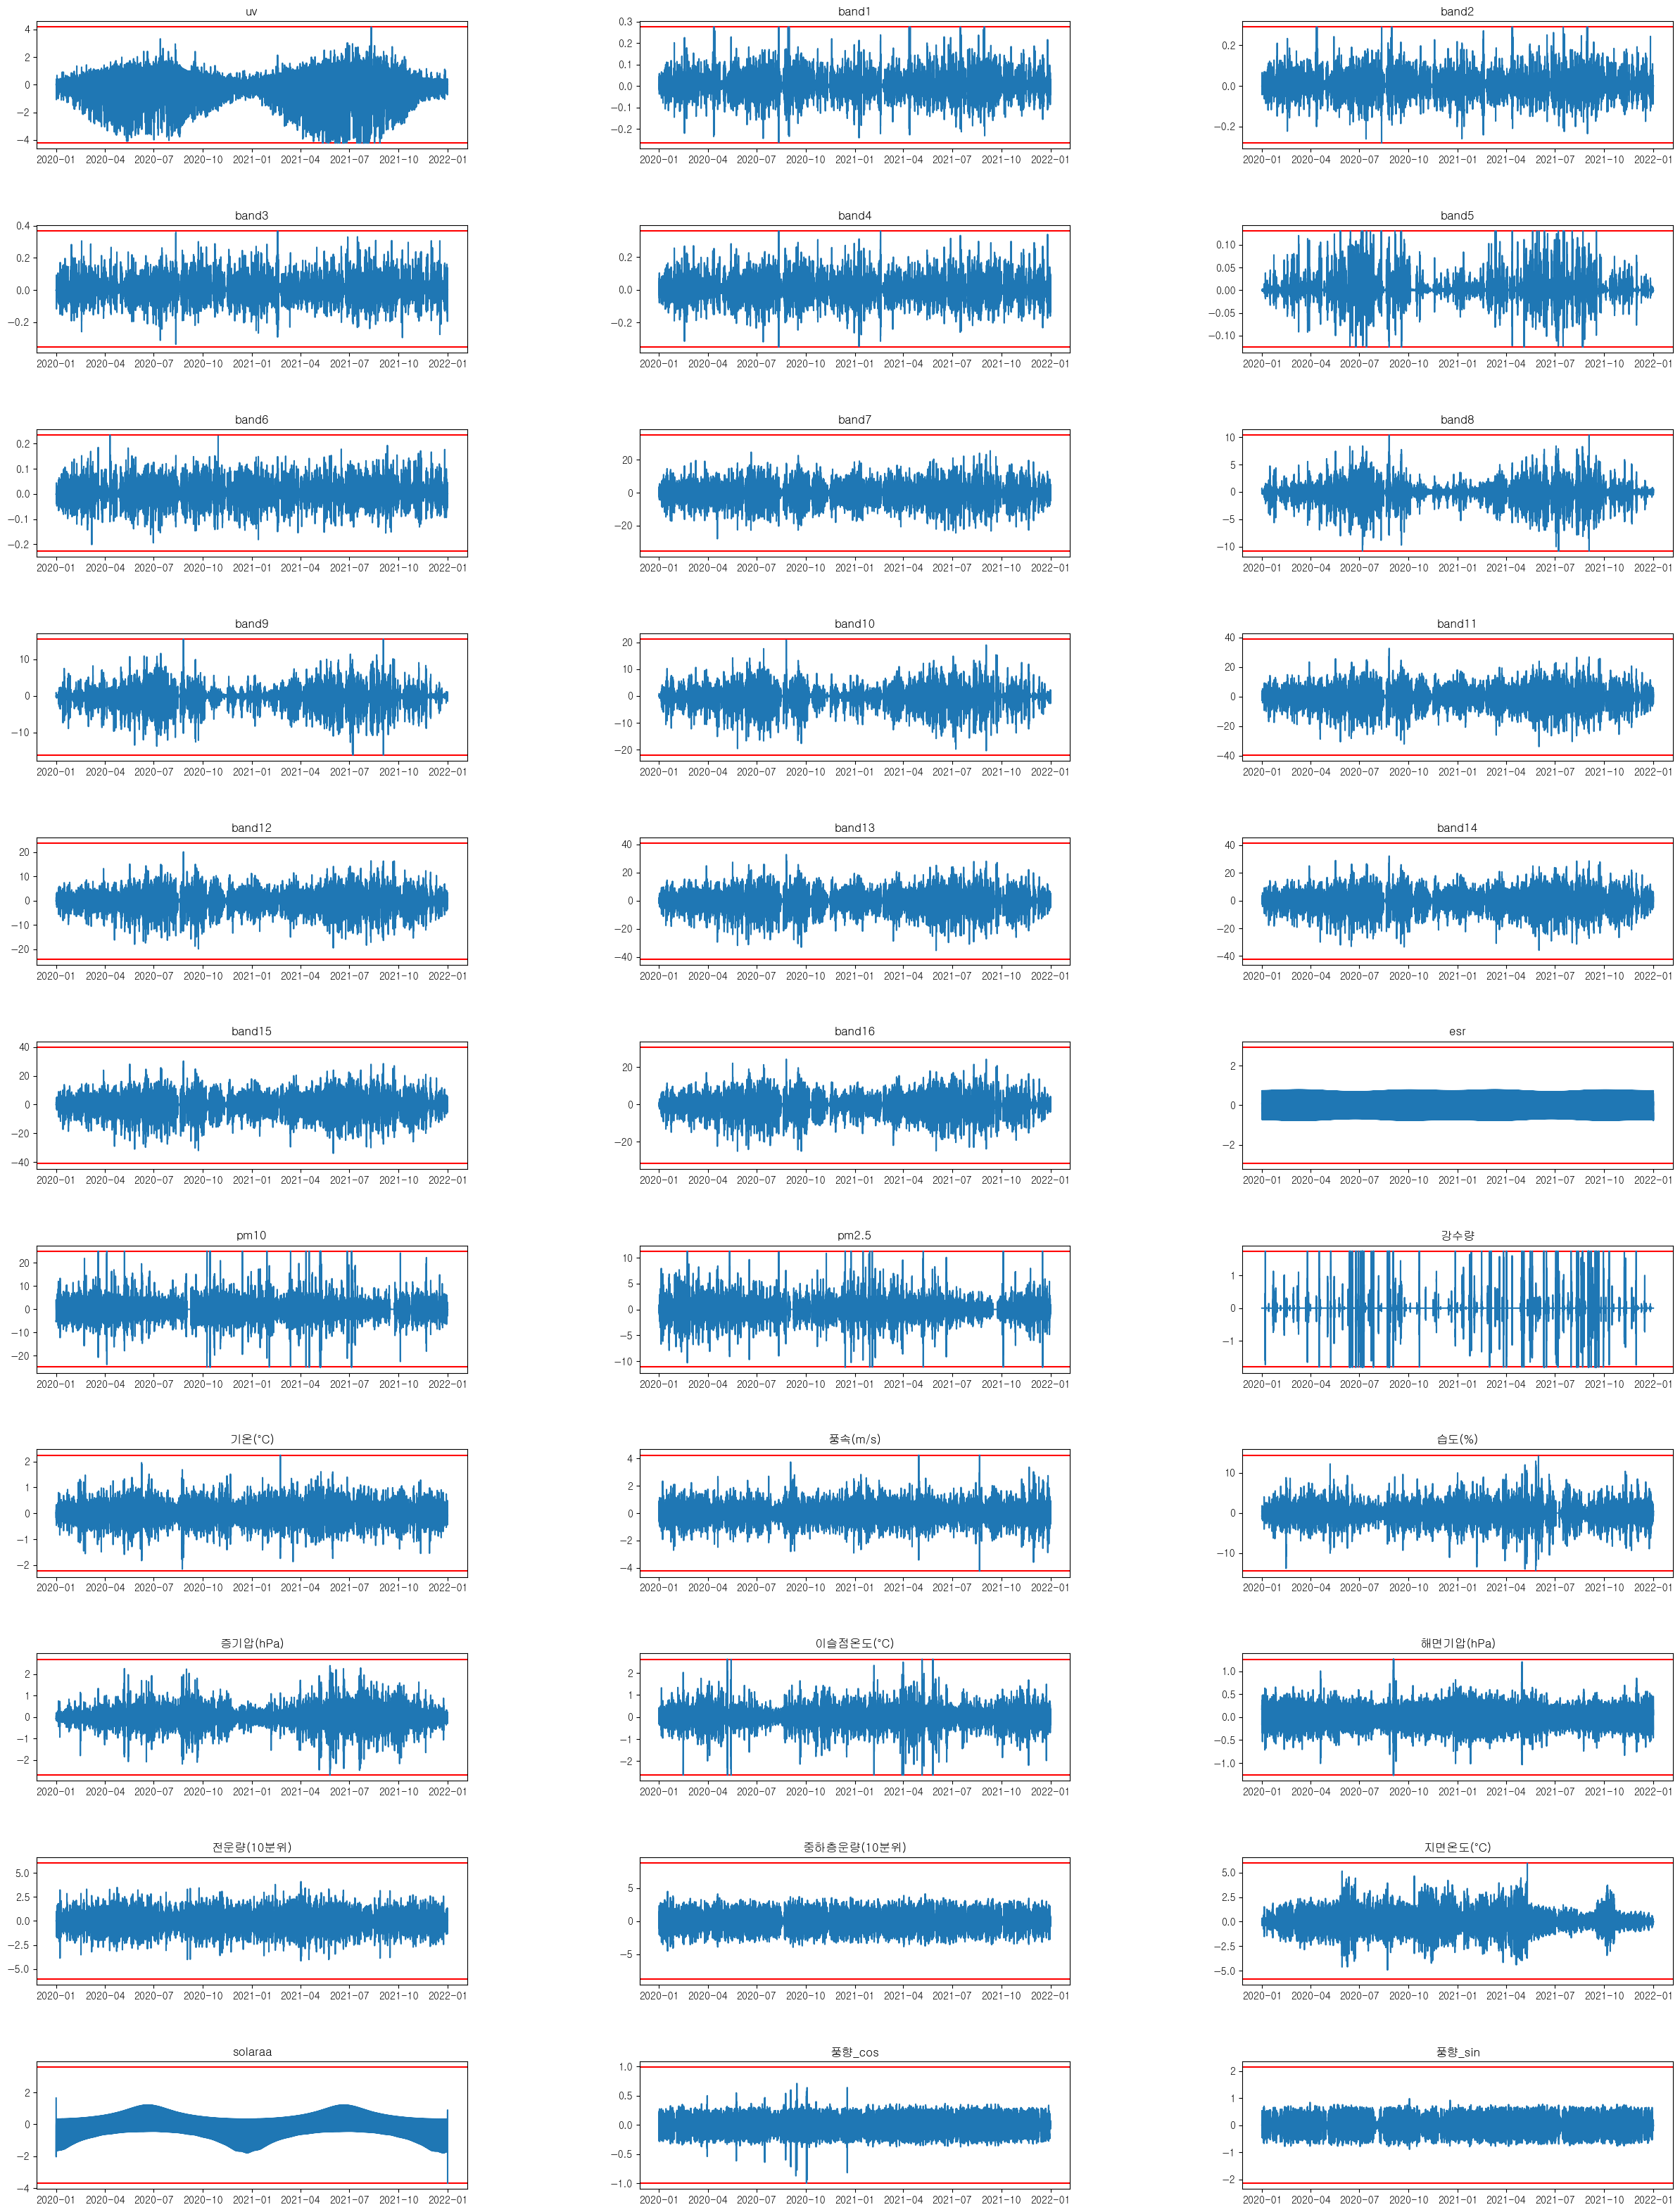

In [17]:
gp = plt.figure(figsize=(30,40))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.6)  # figure 설정
    
for i in range(1,34):
    ax = gp.add_subplot(11, 3, i)
    ax.set_title(f'{merged_df.columns[i-1]}')
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR

    ax.axhline(y=lower, color='red')
    ax.axhline(y=higher, color='red')
    plt.plot(merged_df[merged_df.columns[i-1]])

In [18]:
merged_df = pd.concat([merged_df, stn[0]['lon'], stn[0]['lat'], stn[0]['sateza'], stn[0]['height'], stn[0]['landtype'], stn[0]['해발고도']], axis=1)
merged_df

,uv,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,지면온도(°C),solaraa,풍향_cos,풍향_sin,lon,lat,sateza,height,landtype,해발고도
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.000004,0.000413,0.000098,0.000084,-0.000903,0.000155,-0.000075,3.073563,0.312385,0.752173,...,-0.005496,1.647369,0.006151,-0.009737,126.16,33.3,38.96359,71.0,0.0,71
2020-01-01 00:10:00,-0.000016,-0.000288,-0.000060,0.001209,-0.000193,-0.000186,0.000004,0.664371,0.429766,0.754047,...,0.006308,0.419671,0.007178,-0.015350,126.16,33.3,38.96359,71.0,0.0,71
2020-01-01 00:20:00,-0.000040,0.000282,0.000263,-0.000243,0.000241,0.000071,0.000003,1.158467,0.557154,0.831468,...,0.011819,-0.644961,0.003861,-0.008926,126.16,33.3,38.96359,71.0,0.0,71
2020-01-01 00:30:00,-0.000052,-0.000163,0.000259,0.000065,0.000267,-0.000627,-0.000231,1.642745,0.674040,0.903232,...,0.009208,-1.483783,-0.038804,0.106167,126.16,33.3,38.96359,71.0,0.0,71
2020-01-01 00:40:00,-0.000010,-0.000775,-0.000225,-0.000679,-0.000544,-0.000204,0.000078,1.217984,0.464763,0.693264,...,0.000811,-2.030602,0.010571,-0.032012,126.16,33.3,38.96359,71.0,0.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,0.000055,-0.000779,0.000575,0.000112,-0.000312,-0.000036,0.000164,1.645114,0.397145,0.696891,...,-0.025157,-2.524984,0.002845,0.007817,126.16,33.3,38.96359,71.0,0.0,71
2021-12-31 23:20:00,-0.000045,0.000408,-0.000038,-0.000254,-0.000566,0.000363,0.000227,4.229321,0.543735,0.862968,...,-0.002459,-3.639763,0.006502,0.017863,126.16,33.3,38.96359,71.0,0.0,71
2021-12-31 23:30:00,-0.000089,-0.000020,-0.000149,0.001004,0.000008,-0.000232,-0.000197,2.749027,0.462392,0.446532,...,0.009898,-3.689672,0.009853,0.027071,126.16,33.3,38.96359,71.0,0.0,71


In [19]:
# stn1 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn1.csv')

## stn 2~ 15

In [20]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[1]['Datetime'] = pd.to_datetime(stn[1]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[1] = stn[1].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[1][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)

# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[1]['lon'], stn[1]['lat'], stn[1]['sateza'], stn[1]['height'], stn[1]['landtype'], stn[1]['해발고도']], axis=1)

# stn2 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn2.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\3522682058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[1]['Datetime'] = pd.to_datetime(stn[1]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [21]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[2]['Datetime'] = pd.to_datetime(stn[2]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[2] = stn[2].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[2][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[2]['lon'], stn[2]['lat'], stn[2]['sateza'], stn[2]['height'], stn[2]['landtype'], stn[2]['해발고도']], axis=1)

# stn3 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn3.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\1368436359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[2]['Datetime'] = pd.to_datetime(stn[2]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [22]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[3]['Datetime'] = pd.to_datetime(stn[3]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[3] = stn[3].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[3][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[3]['lon'], stn[3]['lat'], stn[3]['sateza'], stn[3]['height'], stn[3]['landtype'], stn[3]['해발고도']], axis=1)

# stn4 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn4.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\3563737434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[3]['Datetime'] = pd.to_datetime(stn[3]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [23]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[4]['Datetime'] = pd.to_datetime(stn[4]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[4] = stn[4].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[4][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[4]['lon'], stn[4]['lat'], stn[4]['sateza'], stn[4]['height'], stn[4]['landtype'], stn[4]['해발고도']], axis=1)

# stn5 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn5.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\1314920257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[4]['Datetime'] = pd.to_datetime(stn[4]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [24]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[5]['Datetime'] = pd.to_datetime(stn[5]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[5] = stn[5].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[5][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[5]['lon'], stn[5]['lat'], stn[5]['sateza'], stn[5]['height'], stn[5]['landtype'], stn[5]['해발고도']], axis=1)

# stn6 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn6.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\3878271714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[5]['Datetime'] = pd.to_datetime(stn[5]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [25]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[6]['Datetime'] = pd.to_datetime(stn[6]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[6] = stn[6].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[6][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[6]['lon'], stn[6]['lat'], stn[6]['sateza'], stn[6]['height'], stn[6]['landtype'], stn[6]['해발고도']], axis=1)

# stn7 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn7.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\1771422350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[6]['Datetime'] = pd.to_datetime(stn[6]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [26]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[7]['Datetime'] = pd.to_datetime(stn[7]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[7] = stn[7].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[7][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[7]['lon'], stn[7]['lat'], stn[7]['sateza'], stn[7]['height'], stn[7]['landtype'], stn[7]['해발고도']], axis=1)

# stn8 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn8.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\1495136583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[7]['Datetime'] = pd.to_datetime(stn[7]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [27]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[8]['Datetime'] = pd.to_datetime(stn[8]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[8] = stn[8].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[8][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[8]['lon'], stn[8]['lat'], stn[8]['sateza'], stn[8]['height'], stn[8]['landtype'], stn[8]['해발고도']], axis=1)

# stn9 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn9.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\2628778682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[8]['Datetime'] = pd.to_datetime(stn[8]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [28]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[9]['Datetime'] = pd.to_datetime(stn[9]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[9] = stn[9].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[9][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[9]['lon'], stn[9]['lat'], stn[9]['sateza'], stn[9]['height'], stn[9]['landtype'], stn[9]['해발고도']], axis=1)

# stn10 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn10.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\1587588044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[9]['Datetime'] = pd.to_datetime(stn[9]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [29]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[10]['Datetime'] = pd.to_datetime(stn[10]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[10] = stn[10].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[10][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[10]['lon'], stn[10]['lat'], stn[10]['sateza'], stn[10]['height'], stn[10]['landtype'], stn[10]['해발고도']], axis=1)

# stn11 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn11.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\715788297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[10]['Datetime'] = pd.to_datetime(stn[10]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [30]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[11]['Datetime'] = pd.to_datetime(stn[11]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[11] = stn[11].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[11][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[11]['lon'], stn[11]['lat'], stn[11]['sateza'], stn[11]['height'], stn[11]['landtype'], stn[11]['해발고도']], axis=1)

# stn12 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn12.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\2278641466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[11]['Datetime'] = pd.to_datetime(stn[11]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [31]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[12]['Datetime'] = pd.to_datetime(stn[12]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[12] = stn[12].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[12][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[12]['lon'], stn[12]['lat'], stn[12]['sateza'], stn[12]['height'], stn[12]['landtype'], stn[12]['해발고도']], axis=1)

# stn13 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn13.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\1195701496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[12]['Datetime'] = pd.to_datetime(stn[12]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [32]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[13]['Datetime'] = pd.to_datetime(stn[13]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[13] = stn[13].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[13][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[13]['lon'], stn[13]['lat'], stn[13]['sateza'], stn[13]['height'], stn[13]['landtype'], stn[13]['해발고도']], axis=1)

# stn14 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn14.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\2313599516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[13]['Datetime'] = pd.to_datetime(stn[13]['Datetime'], format='%Y-%m-%d %H:%M:%S')


In [33]:
# 인덱스 datetime으로 설정
residue=[0]*(len(stl_list))
stn[14]['Datetime'] = pd.to_datetime(stn[14]['Datetime'], format='%Y-%m-%d %H:%M:%S')
stn[14] = stn[14].set_index('Datetime')

# 칼럼별 stl분해
for i in range(len(stl_list)):
    res = STL(stn[14][stl_list[i]], period=7).fit()
    residue[i] = pd.DataFrame(res.resid)
    
# 데이터프레임들을 병합
dfs = [residue[0],residue[1],residue[2],residue[3],residue[4],residue[5],residue[6],residue[7],residue[8],residue[9],residue[10],\
       residue[11],residue[12],residue[13],residue[14],residue[15],residue[16],residue[17],residue[18],residue[19],residue[20], \
       residue[21],residue[22],residue[23],residue[24],residue[25],residue[26],residue[27],residue[28],residue[29],residue[30], \
       residue[31], residue[32]]
merged_df = pd.DataFrame(index=dfs[0].index)
for i, df in enumerate(dfs):
    col_name = stl_list[i]
    merged_df[col_name] = df['resid']
    
# 이상치 처리(윈저화)
for i in range(1,34):
    Q1 = np.percentile(merged_df[merged_df.columns[i-1]], 1.2)
    Q3 = np.percentile(merged_df[merged_df.columns[i-1]], 98.8)
    IQR = Q3 - Q1 
    IQR = IQR if IQR > 0 else -1*IQR
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    merged_df.loc[merged_df[merged_df.columns[i-1]]<lower, merged_df.columns[i-1]] = lower
    merged_df.loc[merged_df[merged_df.columns[i-1]]>higher, merged_df.columns[i-1]] = higher

# stl분해 안한 칼럼 통합
merged_df = pd.concat([merged_df, stn[14]['lon'], stn[14]['lat'], stn[14]['sateza'], stn[14]['height'], stn[14]['landtype'], stn[14]['해발고도']], axis=1)

# stn15 저장
merged_df.to_csv(f'stl_이상치처리데이터\stn15.csv')

C:\Users\JAE\AppData\Local\Temp\ipykernel_17612\3268877909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn[14]['Datetime'] = pd.to_datetime(stn[14]['Datetime'], format='%Y-%m-%d %H:%M:%S')
